## a, b)

In [2]:
from matplotlib import pyplot as plt

def show_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

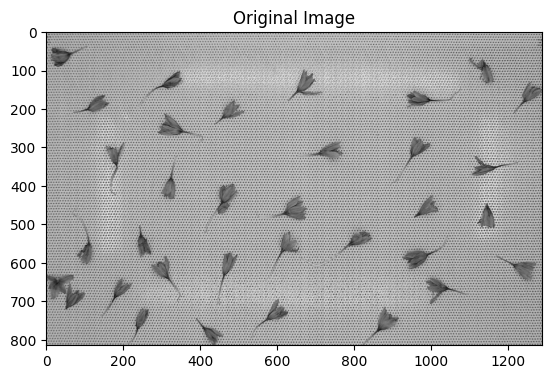

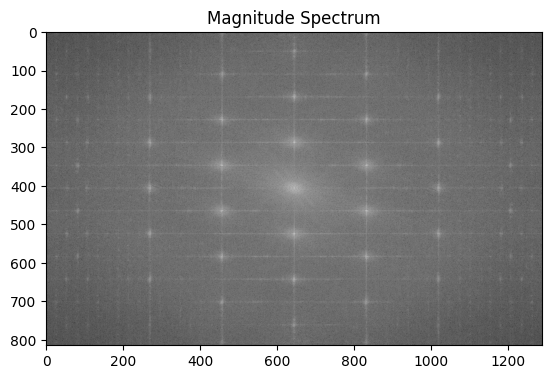

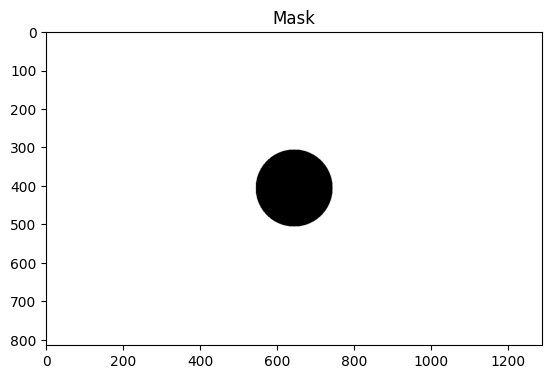

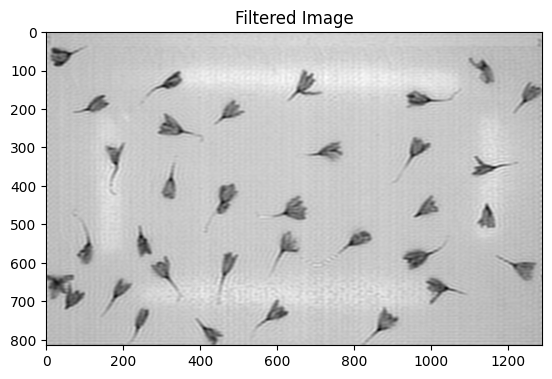

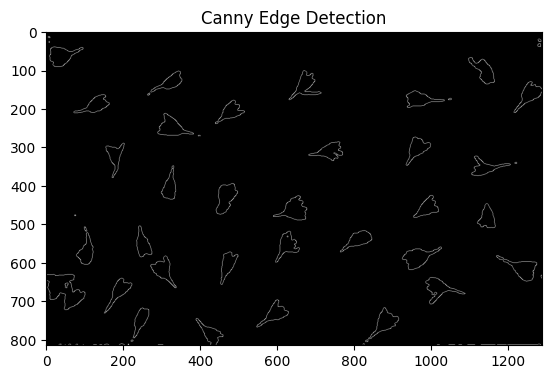

In [3]:

import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

# Define a function to show images
def show_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()
    
def remove_noise_fft(img):
    returns = [(img, "Original Image")]
    
    # Apply Fourier Transform
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    returns.append((magnitude_spectrum, "Magnitude Spectrum"))
    
    # Create a mask
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[:, :] = 1
    r = 100
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
    mask[mask_area] = 0
    returns.append((mask*255, "Mask"))
    
    # Apply the mask
    fshift_filtered = fshift * (1 - mask)
    fshift_filtered_shifted = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(fshift_filtered_shifted)
    img_back = np.real(img_back)
    returns.append((img_back, "Filtered Image"))

    # Apply Canny edge detection
    img_canny = img_back.copy()
    threshold = 140
    img_canny[img_canny < threshold] = 0
    img_canny[img_canny >= threshold] = 255
    canny = cv2.Canny(img_canny.astype(np.uint8), 70, 100)
    returns.append((canny, "Canny Edge Detection"))
    
    return returns
    
img = cv2.imread("images/saffrun.jpg", 0)
imgs = remove_noise_fft(img)
for i in imgs:
    show_image(i[0], i[1])


# c)

In [4]:
img = cv2.imread("images/saffrun1.png", 0)

def show_gradient_arrows(img, step_size=10):
    # Generate a grid of points
    x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))

    # Generate the arrow plot
    Gx, Gy = np.gradient(img)
    plt.quiver(x[::step_size, ::step_size], y[::step_size, ::step_size],
                  Gx[::step_size, ::step_size], Gy[::step_size, ::step_size],
                    color='r', units='xy', scale=1) 

    # Show the image
    plt.imshow(img, cmap='gray')
    plt.show()

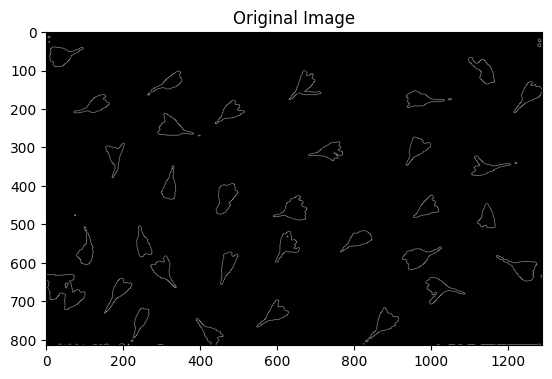

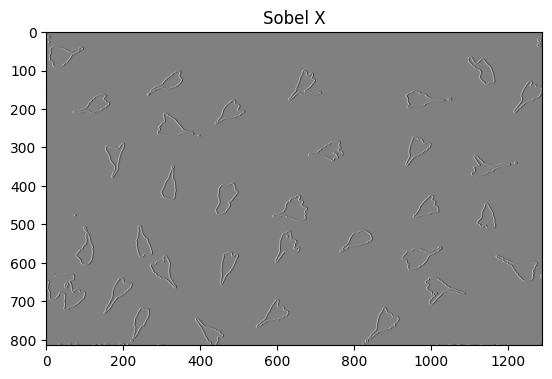

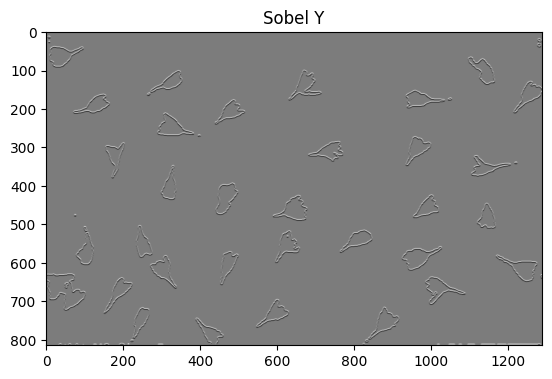

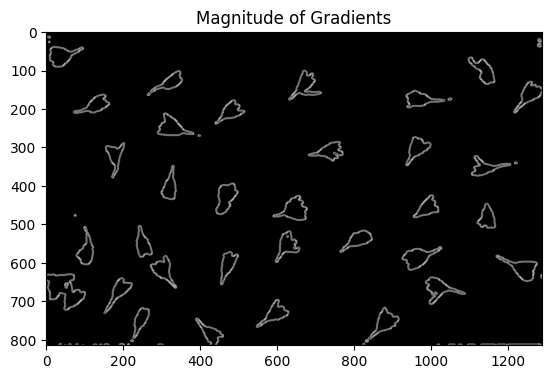

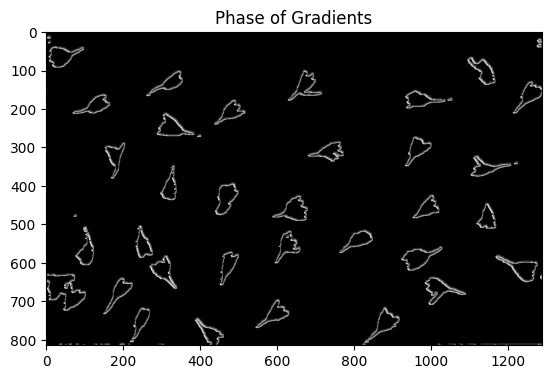

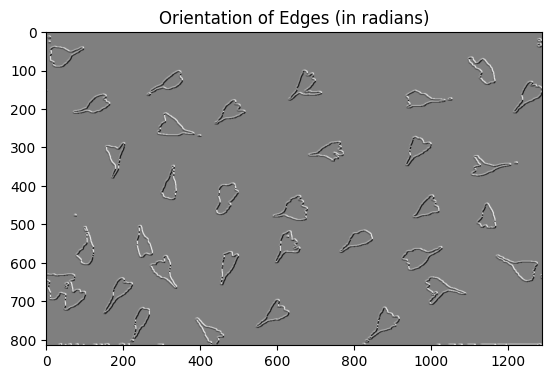

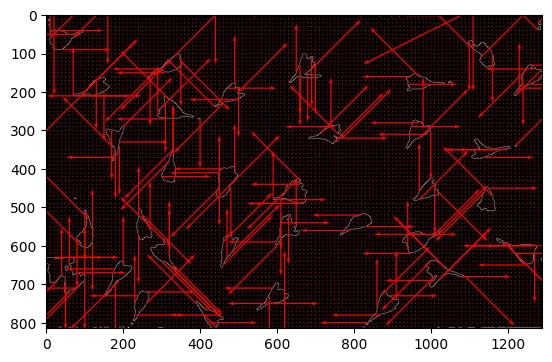

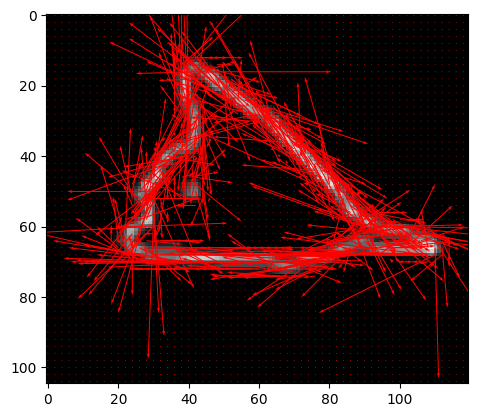

In [5]:
img_back = imgs[4][0]

# Compute gradients in x and y direction
sobelx = cv2.Sobel(img_back, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img_back, cv2.CV_64F, 0, 1, ksize=5)

# Convert gradients to magnitude and phase
mag, phase = cv2.cartToPolar(sobelx, sobely)

# Calculate orientation of edges in radians
orientation = np.arctan2(sobely, sobelx)

show_image(img_back, 'Original Image')
show_image(sobelx, 'Sobel X')
show_image(sobely, 'Sobel Y')
show_image(mag, 'Magnitude of Gradients')
show_image(phase, 'Phase of Gradients')
show_image(orientation, 'Orientation of Edges (in radians)')

show_gradient_arrows(img_back)
show_gradient_arrows(cv2.imread("images/saffrun1.png", 0), 2)